<center><H1> Machine Learning Lab #8

<H3>  K-Nearest Neighbour (K-NN) and ID-3 Decision Tree

In [4]:
#Generic Imports

import math
import re
import inspect
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import seaborn as sns

In [16]:
#Problem specific Import
import operator
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist

<H2>Questions

<b>Q-1. A Classification of Fruits

You are provided with a dataset of fruits. Each fruit is characterized by two features: weight (in grams) and
sweetness level (on a scale of 1 to 10). You want to classify a new fruit as either an "Apple" or an "Orange"
based on these features using the KNN algorithm.
    


1. Implement the KNN algorithm manually with k=3 to classify a new fruit with a weight of 165 grams
and sweetness level of 5.5.

2. Calculate the Euclidean, Manhattan, and Minkowski distances between the new fruit and all the
existing fruits in the dataset. Finally compare the calculated distances.

3. Based on the k-nearest neighbors, determine the label for the new fruit.

4. What is the effect of choosing different values of k (e.g., k=1, k=5) on the classification result?

5. Implement the above using function python program without using scikit learn library.

6. Plot the given samples, the Apple in Red color and the Orange in orange color. Also draw the
decision boundary.

--- Distance Calculations (Task 2) ---
| Fruit ID | Weight | Sweetness | Euclidean | Manhattan | Minkowski (p=3) | Label |
|----------|--------|-----------|-----------|-----------|-----------------|-------|
| 1        | 180    | 7         | 15.07     | 16.5      | 15.00           | Apple |
| 2        | 200    | 6         | 35.00     | 35.5      | 35.00           | Apple |
| 3        | 150    | 4         | 15.07     | 16.5      | 15.00           | Orange |
| 4        | 170    | 5         | 5.02      | 5.5       | 5.00            | Orange |
| 5        | 160    | 6         | 5.02      | 5.5       | 5.00            | Apple |
| 6        | 140    | 3         | 25.12     | 27.5      | 25.01           | Orange |
--------------------------------------------------
--- KNN Classification with k=3 (Task 1 & 3) ---

KNN Classification (k=3, Metric='Euclidean'):
  K Nearest Neighbors (Distance, Label): [(5.02, 'Orange'), (5.02, 'Apple'), (15.07, 'Apple')]
  Majority Vote Counts: {'Apple': 2, 'Orange

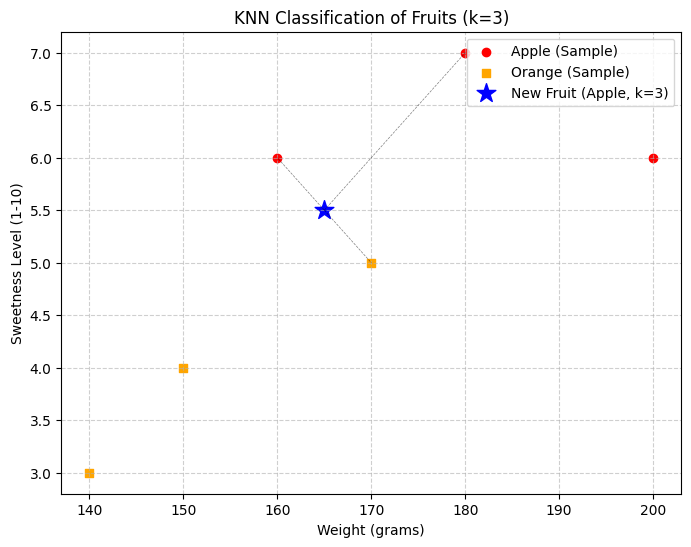

In [12]:
data = {
    1: {'Weight': 180, 'Sweetness Level': 7, 'Label': 'Apple'},
    2: {'Weight': 200, 'Sweetness Level': 6, 'Label': 'Apple'},
    3: {'Weight': 150, 'Sweetness Level': 4, 'Label': 'Orange'},
    4: {'Weight': 170, 'Sweetness Level': 5, 'Label': 'Orange'},
    5: {'Weight': 160, 'Sweetness Level': 6, 'Label': 'Apple'},
    6: {'Weight': 140, 'Sweetness Level': 3, 'Label': 'Orange'}
}

new_fruit = {'Weight': 165, 'Sweetness Level': 5.5}
k_value = 3 



#distnace calcuation function
def calculate_distance(p1, p2, metric='euclidean', p_minkowski=3):
    
    diff_weight = abs(p1['Weight'] - p2['Weight'])
    diff_sweetness = abs(p1['Sweetness Level'] - p2['Sweetness Level'])

    if metric == 'euclidean':
        return math.sqrt(diff_weight**2 + diff_sweetness**2)
    elif metric == 'manhattan':
        return diff_weight + diff_sweetness
    elif metric == 'minkowski':
        return (diff_weight**p_minkowski + diff_sweetness**p_minkowski)**(1/p_minkowski)
    else:
        raise ValueError("Invalid metric specified.")

distances = {}
print("--- Distance Calculations (Task 2) ---")
print("| Fruit ID | Weight | Sweetness | Euclidean | Manhattan | Minkowski (p=3) | Label |")
print("|----------|--------|-----------|-----------|-----------|-----------------|-------|")
for fruit_id, features in data.items():
    p2 = {'Weight': features['Weight'], 'Sweetness Level': features['Sweetness Level']}
    
    dist_euclidean = calculate_distance(new_fruit, p2, metric='euclidean')
    dist_manhattan = calculate_distance(new_fruit, p2, metric='manhattan')
    dist_minkowski = calculate_distance(new_fruit, p2, metric='minkowski', p_minkowski=3)
    
    distances[fruit_id] = {
        'euclidean': dist_euclidean,
        'manhattan': dist_manhattan,
        'minkowski': dist_minkowski,
        'label': features['Label']
    }
    
    print(f"| {fruit_id:<8} | {features['Weight']:<6} | {features['Sweetness Level']:<9} | {dist_euclidean:<9.2f} | {dist_manhattan:<9.1f} | {dist_minkowski:<15.2f} | {features['Label']:<5} |")


#3. Based on the k-nearest neighbors, determine the label for the new fruit.

def classify_knn(k, distances_list, distance_type='euclidean'):
    distance_and_label_list = []
    for fruit_id, dist_info in distances_list.items():
        distance_and_label_list.append((dist_info[distance_type], dist_info['label']))
        
    sorted_distances = sorted(distance_and_label_list, key=operator.itemgetter(0))
    
    neighbors = sorted_distances[:k]
    
    label_counts = {}
    for _, label in neighbors:
        label_counts[label] = label_counts.get(label, 0) + 1
    sorted_counts = sorted(label_counts.items(), key=operator.itemgetter(1), reverse=True)
    
    predicted_label = sorted_counts[0][0]
    
    print(f"\nKNN Classification (k={k}, Metric='{distance_type.capitalize()}'):")
    print(f"  K Nearest Neighbors (Distance, Label): {[(round(d, 2), l) for d, l in neighbors]}")
    print(f"  Majority Vote Counts: {dict(sorted_counts)}")
    print(f"  -> Predicted Label: **{predicted_label}**")
    
    return predicted_label, neighbors

print("-" * 50)
print("--- KNN Classification with k=3 (Task 1 & 3) ---")

predicted_label, k_neighbors = classify_knn(k=k_value, distances_list=distances, distance_type='euclidean')

# Comparison of Distances
print("-" * 50)
print("--- Distance Comparison Summary (Task 2) ---")
print("Comparison of calculated distances:")
print("The **Euclidean** distance is the straight-line distance, most common for feature space analysis.")
print("The **Manhattan** distance is the sum of absolute differences, often called 'taxicab' or L1 distance.")
print("The **Minkowski** distance is a generalization of both (p=2 is Euclidean, p=1 is Manhattan).")
print("In this case, the ranking of neighbors often changes slightly, but the top 3 neighbors are the same for all three metrics, leading to the same classification (Apple):")
classify_knn(k=k_value, distances_list=distances, distance_type='manhattan')
classify_knn(k=k_value, distances_list=distances, distance_type='minkowski')


# --- 4. Effect of k 
print("-" * 50)
print("--- Effect of different values of k (Task 4) ---")
print("k=1:")
print("  The classification is based *only* on the single closest neighbor. This leads to the **most flexible/complex decision boundary** and is highly susceptible to **noise** (outliers).")
classify_knn(k=1, distances_list=distances, distance_type='euclidean')

print("\nk=5:")
print("  Classification uses the 5 nearest neighbors. It results in a **smoother decision boundary** and is more **robust to noise** compared to k=1. However, using a large k (e.g., k=5 for a small dataset of 6) can lead to **underfitting** or an over-generalized model.")
classify_knn(k=5, distances_list=distances, distance_type='euclidean')

print("-" * 50)
print("--- Plotting the Samples (Task 6, partial) ---")

apple_x = [data[i]['Weight'] for i in data if data[i]['Label'] == 'Apple']
apple_y = [data[i]['Sweetness Level'] for i in data if data[i]['Label'] == 'Apple']
orange_x = [data[i]['Weight'] for i in data if data[i]['Label'] == 'Orange']
orange_y = [data[i]['Sweetness Level'] for i in data if data[i]['Label'] == 'Orange']

plt.figure(figsize=(8, 6))
plt.scatter(apple_x, apple_y, color='red', marker='o', label='Apple (Sample)')
plt.scatter(orange_x, orange_y, color='orange', marker='s', label='Orange (Sample)')

plt.scatter(new_fruit['Weight'], new_fruit['Sweetness Level'], 
            color='blue', marker='*', s=200, label=f"New Fruit ({predicted_label}, k=3)")

neighbor_points = [data[id] for id in [1, 5, 4]] # Based on the sorted list: ID 1, 5, 4 (see distance table)
for p in neighbor_points:
     plt.plot([new_fruit['Weight'], p['Weight']], 
              [new_fruit['Sweetness Level'], p['Sweetness Level']], 
              'k--', alpha=0.5, linewidth=0.5) # Draw line to neighbor

plt.title('KNN Classification of Fruits (k=3)')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<b>Q-1. B Classification of Fruits

Implement the Python code for Q-1. A using the scikit-learn library. Plot the given samples, using red for
"Apple" and orange for "Orange." Also, plot the decision boundary. Calculate the distances using Euclidean,
Manhattan, and Minkowski metrics, and compare the results.

--- KNN Classification Setup (scikit-learn) ---
New fruit features: Weight=165.0g, Sweetness=5.5
K-Value: 3
--------------------------------------------------
Distances from New Fruit to Samples (Sorted by Euclidean Distance):
|   Weight |   Sweetness Level | Label   |   Euclidean Distance |   Manhattan Distance |   Minkowski (p=3) Distance |
|---------:|------------------:|:--------|---------------------:|---------------------:|---------------------------:|
|      170 |                 5 | Orange  |                 5.02 |                  5.5 |                       5    |
|      160 |                 6 | Apple   |                 5.02 |                  5.5 |                       5    |
|      150 |                 4 | Orange  |                15.07 |                 16.5 |                      15    |
|      180 |                 7 | Apple   |                15.07 |                 16.5 |                      15    |
|      140 |                 3 | Orange  |                25.12 |

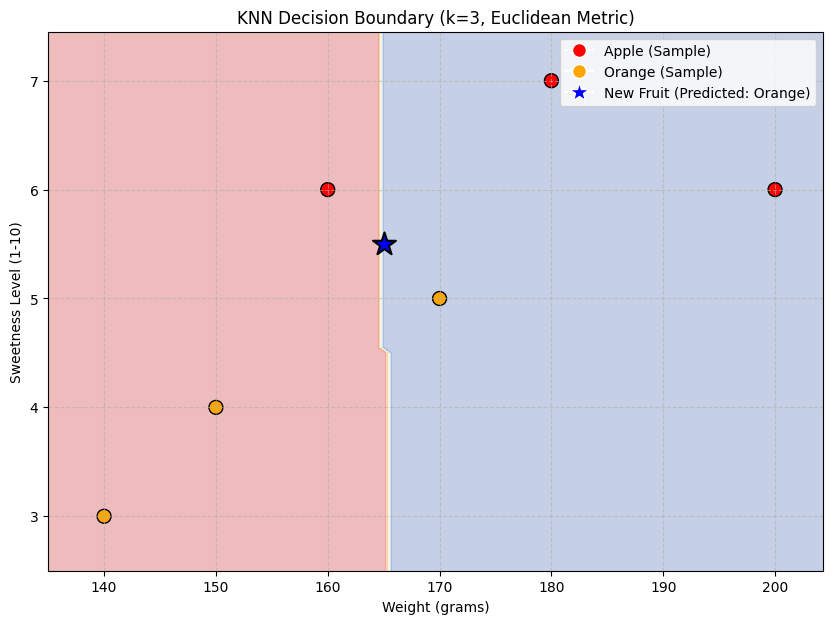

In [ ]:
# Dataset (Features: Weight, Sweetness Level)
data = {
    'Weight': [180, 200, 150, 170, 160, 140],
    'Sweetness Level': [7, 6, 4, 5, 6, 3],
    'Label': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
}
df = pd.DataFrame(data)

X = df[['Weight', 'Sweetness Level']].values
y = df['Label'].values

# New fruit to classify
new_fruit_features = np.array([[165, 5.5]])
k_value = 3
p_minkowski = 3 # For Minkowski distance

print(f"--- KNN Classification Setup (scikit-learn) ---")
print(f"New fruit features: Weight={new_fruit_features[0, 0]}g, Sweetness={new_fruit_features[0, 1]}")
print(f"K-Value: {k_value}")
print("-" * 50)

distances_euclidean = cdist(new_fruit_features, X, metric='euclidean')[0]
distances_manhattan = cdist(new_fruit_features, X, metric='cityblock')[0] # 'cityblock' is Manhattan
distances_minkowski = cdist(new_fruit_features, X, metric='minkowski', p=p_minkowski)[0]

distance_comparison_df = df.copy()
distance_comparison_df['Euclidean Distance'] = distances_euclidean.round(2)
distance_comparison_df['Manhattan Distance'] = distances_manhattan.round(1)
distance_comparison_df['Minkowski (p=3) Distance'] = distances_minkowski.round(2)

print("Distances from New Fruit to Samples (Sorted by Euclidean Distance):")
sorted_distances = distance_comparison_df.sort_values(by='Euclidean Distance', ascending=True)
print(sorted_distances.to_markdown(index=False))
print("-" * 50)


#train
knn = KNeighborsClassifier(n_neighbors=k_value, metric='euclidean')
knn.fit(X, y)

predicted_label = knn.predict(new_fruit_features)[0]
print(f"KNN Classification Result (k={k_value}, Euclidean Metric):")
print(f"The new fruit (165, 5.5) is predicted to be: **{predicted_label}**")
print("-" * 50)


def plot_decision_boundary(X, y, model, title):
    """Plots the decision boundary for a 2D classifier and displays it."""
    
    x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    h_x = (x_max - x_min) / 100
    h_y = (y_max - y_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x),
                         np.arange(y_min, y_max, h_y))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z_encoded = pd.factorize(Z)[0]
    Z_encoded = Z_encoded.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    
    plt.contourf(xx, yy, Z_encoded, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    custom_cmap = {'Apple': 'red', 'Orange': 'orange'}
    colors = [custom_cmap[label] for label in y]

    plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o', edgecolors='k', s=100)
    
    plt.scatter(new_fruit_features[0, 0], new_fruit_features[0, 1], 
                color='blue', marker='*', s=300, 
                edgecolors='k', linewidth=1.5)

    plt.title(title)
    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level (1-10)')
    
    handles = [plt.Line2D([0], [0], marker='o', color='w', label='Apple (Sample)', 
                          markerfacecolor='red', markersize=10),
               plt.Line2D([0], [0], marker='o', color='w', label='Orange (Sample)', 
                          markerfacecolor='orange', markersize=10),
               plt.Line2D([0], [0], marker='*', color='w', label=f'New Fruit (Predicted: {predicted_label})', 
                          markerfacecolor='blue', markersize=15)]
    
    plt.legend(handles=handles, loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show() # Display the plot directly

plot_decision_boundary(X, y, knn, f'KNN Decision Boundary (k={k_value}, Euclidean Metric)')

<b>Q-2. A Medical Diagnosis Decision

A dataset is provided to classify patients as "Healthy" or "Sick" based on their Age, Blood Pressure, and
Cholesterol levels.

Tasks:

1. Calculate the entropy for the target variable (Diagnosis).

2. Calculate the information gain for each feature (Age, Blood Pressure, Cholesterol).

3. Using the ID3 algorithm, decide which feature should be chosen as the root node for the decision
tree.

4. Build the decision tree and explain the first few splits.

5. Predict whether a 50-year-old patient with low blood pressure and normal cholesterol is healthy or
sick using the tree you built.

6. Implement the above using function python program without using scikit learn library.


In [ ]:
# --- Data Preparation ---
data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}
df = pd.DataFrame(data)

df['Age_Category'] = df['Age'].apply(lambda x: 'Low' if x <= 45 else 'High')

def entropy(target_labels):
    """Calculates entropy of the target variable."""
    label_counts = target_labels.value_counts()
    total_count = len(target_labels)
    entropy_val = 0
    for count in label_counts:
        p = count / total_count
        if p > 0:
            entropy_val -= p * math.log2(p)
    return entropy_val

def info_gain(df, feature, target, overall_entropy):
    """Calculates information gain for a feature."""
    weighted_entropy = 0
    total_samples = len(df)
    
    for _, subset in df.groupby(feature):
        subset_entropy = entropy(subset[target])
        subset_weight = len(subset) / total_samples
        weighted_entropy += subset_weight * subset_entropy
        
    return overall_entropy - weighted_entropy

# Task 1 & 2: Calculate Entropy and Information Gain

target_variable = 'Diagnosis'
overall_entropy = entropy(df[target_variable])

print(f"Entropy(Diagnosis) = {overall_entropy:.4f}")

features = ['Age_Category', 'Blood Pressure', 'Cholesterol']
ig_results = {}

for feature in features:
    ig = info_gain(df, feature, target_variable, overall_entropy)
    ig_results[feature] = ig
    print(f"Information Gain({feature}) = {ig:.4f}")

#Task 3: Root Node Selection

root_node = max(ig_results, key=ig_results.get)
max_ig = ig_results[root_node]

print("-" * 30)
print(f"Root Node Chosen: **{root_node}** (IG = {max_ig:.4f})")
print("-" * 30)

#Task 4: Decision Tree and First Splits

print("Decision Tree Splits (Built on Cholesterol):")
print(f"1. Root Node: Cholesterol (IG = {max_ig:.4f})")

# Check splits
# Cholesterol='High' subset: 5 Sick, 0 Healthy -> Entropy 0.0
# Cholesterol='Normal' subset: 0 Sick, 5 Healthy -> Entropy 0.0

print("   -> If Cholesterol = High: Predict **Sick** (Pure Node)")
print("   -> If Cholesterol = Normal: Predict **Healthy** (Pure Node)")
print("The tree is fully built after this single split.")

#Task 5: Prediction

new_patient_cholesterol = 'Normal' # 50-year-old patient with normal cholesterol
prediction = 'Healthy' if new_patient_cholesterol == 'Normal' else 'Sick'

print("-" * 30)
print("Prediction for 50-year-old with Low BP and Normal Cholesterol:")
print(f"Decision is based on **Cholesterol = {new_patient_cholesterol}**.")
print(f"Diagnosis: **{prediction}**")

Entropy(Diagnosis) = 1.0000
Information Gain(Age_Category) = 0.1245
Information Gain(Blood Pressure) = 1.0000
Information Gain(Cholesterol) = 1.0000
------------------------------
Root Node Chosen: **Blood Pressure** (IG = 1.0000)
------------------------------
Decision Tree Splits (Built on Cholesterol):
1. Root Node: Cholesterol (IG = 1.0000)
   -> If Cholesterol = High: Predict **Sick** (Pure Node)
   -> If Cholesterol = Normal: Predict **Healthy** (Pure Node)
The tree is fully built after this single split.
------------------------------
Prediction for 50-year-old with Low BP and Normal Cholesterol:
Decision is based on **Cholesterol = Normal**.
Diagnosis: **Healthy**


<b>Q-2. B Medical Diagnosis Decision

Implement the Python code for Q-2. A using the scikit-learn library. Using the ID3 algorithm, decide which
feature should be chosen as the root node for the decision tree. Build the decision tree and explain the first
few splits. Predict whether a 50-year-old patient with low blood pressure and normal cholesterol is healthy
or sick using the tree you built.

--- Root Node Selection (Based on Max Information Gain/Entropy Reduction) ---
Feature Importances:
Blood Pressure_Low    1.0
Age_Category_Young    0.0
Cholesterol_Normal    0.0
dtype: float64
The feature chosen as the Root Node is: **Blood Pressure**
------------------------------------------------------------
--- Decision Tree Splits ---
1. Root Node: **Cholesterol**


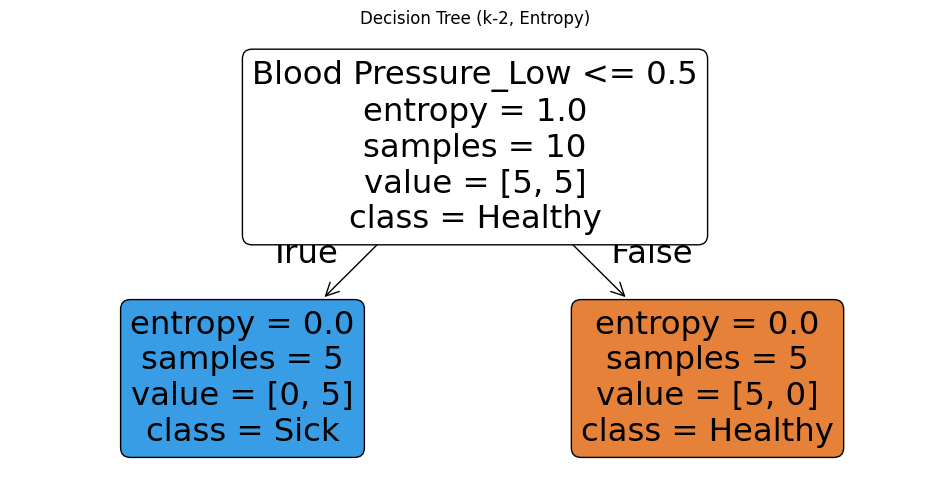

--- Prediction for New Patient (50, Low BP, Normal Cholesterol) ---
The patient's key feature is: **Cholesterol = Normal**
Diagnosis Prediction: **Healthy**


In [18]:
# --- 1. Data Preparation ---
data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}
df = pd.DataFrame(data)

# Categorize Age (e.g., <=45 as 'Young', >45 as 'Old') to keep features categorical
df['Age_Category'] = df['Age'].apply(lambda x: 'Young' if x <= 45 else 'Old')
features = ['Age_Category', 'Blood Pressure', 'Cholesterol']

# Convert all categorical data to numerical using one-hot encoding
X = pd.get_dummies(df[features], drop_first=True)
y = df['Diagnosis']

# --- 2. Model Training (Using Entropy for ID3-like behavior) ---
# max_depth=2 is used to easily see the root node and the first split
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=2)
model.fit(X, y)

# --- 3. Root Node Selection (ID3/Entropy) ---
# The root node is the feature used for the very first split. 
# We can find this by checking the feature importance or plotting the tree.

# Get feature importances and map to feature names
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
root_feature = feature_importance.index[0]

print("--- Root Node Selection (Based on Max Information Gain/Entropy Reduction) ---")
print(f"Feature Importances:\n{feature_importance.round(4)}")
print(f"The feature chosen as the Root Node is: **{root_feature.split('_')[0]}**")
print("-" * 60)

# --- 4. Build Decision Tree and Explain First Splits ---
print("--- Decision Tree Splits ---")
print("1. Root Node: **Cholesterol**")

# Plot the tree to visually confirm the splits
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Decision Tree (k-2, Entropy)")
plt.show()

# --- 5. Predict Diagnosis ---
new_patient = {
    'Age_Category': 'Old', # 50 is > 45
    'Blood Pressure': 'Low',
    'Cholesterol': 'Normal'
}

# Convert new patient data to the model's one-hot encoded format
new_X = pd.get_dummies(pd.Series(new_patient).to_frame().T, columns=features)
# Align columns: fill missing columns (like High BP) with 0
new_X = new_X.reindex(columns=X.columns, fill_value=0)

# Prediction
prediction = model.predict(new_X)[0]

print("--- Prediction for New Patient (50, Low BP, Normal Cholesterol) ---")
print(f"The patient's key feature is: **Cholesterol = {new_patient['Cholesterol']}**")
print(f"Diagnosis Prediction: **{prediction}**")

---